In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
def read_and_preprocess(file_name, columns_to_drop, crucial_na_columns):
    df = pd.read_csv(file_name)
    df.dropna(subset = crucial_na_columns, inplace=True)
    df = df.drop(columns=columns_to_drop)
    return df

def extract_country_row(df, country_name):
    df.loc[df['Country'] == country_name] = df.loc[df['Country'] == country_name].fillna(0)
    return df.loc[df['Country'] == country_name]
    
def find_country_to_minimize_column(df, column_name):
    return df[df[column_name] == df[column_name].min()]["Country"]
def find_country_to_maximize_column(df, column_name):
    return df[df[column_name] == df[column_name].max()]["Country"]

def plot_countries(df, countries, filename):
    x = countries
    y = np.array([])
    for country in countries:
        index = df.index[df['Country'] == country].tolist()
        val = df.loc[df["Country"] == country].get_value(index[0], "Happiness.Score", takeable=False)
        print(val)
        y = np.append(y, [val])
        print(y)
    plt.title("Happiness Index by Country")
    plt.ylabel("Happiness Index")
    plt.xlabel("Country")
    plt.bar(x, y)
    plt.savefig(filename, bbox_inches='tight')
    

In [120]:
df = read_and_preprocess('happiness_data.csv', [], [])
print(find_country_to_minimize_column(df, "Happiness.Score"))
print(find_country_to_maximize_column(df, "Happiness.Score"))

154    Central African Republic
Name: Country, dtype: object
0    Norway
Name: Country, dtype: object


7.537000179290769
[7.53700018]
6.993000030517581
[7.53700018 6.99300003]


/Users/pavan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


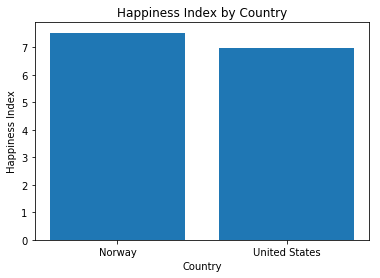

In [121]:
plot_countries(df, ["Norway", "United States"], "1.png")

/Users/pavan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


6.993000030517581
[6.99300003]
2.69300007820129
[6.99300003 2.69300008]


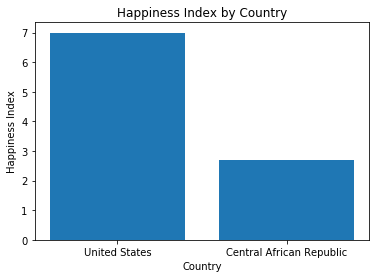

In [122]:
plot_countries(df, ["United States", "Central African Republic"], "2.png")

/Users/pavan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


6.993000030517581
[6.99300003]
4.31500005722046
[6.99300003 4.31500006]
5.2729997634887695
[6.99300003 4.31500006 5.27299976]
4.60799980163574
[6.99300003 4.31500006 5.27299976 4.6079998 ]
5.26200008392334
[6.99300003 4.31500006 5.27299976 4.6079998  5.26200008]


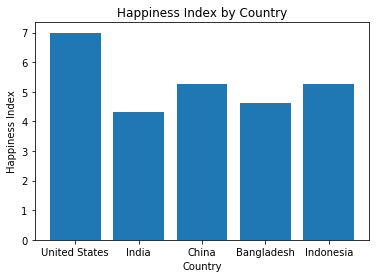

In [123]:
plot_countries(df, ["United States", "India", "China", "Bangladesh", "Indonesia"], "3.png")